## Commutation relations

$$\begin{align}
a(\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_+(\nu)a_{in}(\nu)+\epsilon a^\dagger_{in}(-\nu)\right]\\
a^\dagger(-\nu) &= -\frac{\sqrt{2\kappa}}{m^\prime(\nu)}\left[d_-(\nu)a^\dagger_{in}(-\nu)+\epsilon^* a_{in}(\nu)\right]\\
\left[a_{in}(\nu),a^\dagger_{in}(-\nu^\prime)\right]&=\left(1+\frac{k}{\kappa}\cos{(\phi+\nu\tau)}\right)\delta\left(\nu+\nu^\prime\right)\\
\left[a(\nu),a^\dagger(-\nu^\prime)\right]&=2\frac{\kappa+k\cos{(\phi+\nu\tau)}}{d_+(\nu)d_-(\nu)-|\epsilon|^2}\delta\left(\nu+\nu^\prime\right)\\
\end{align}$$

/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:383: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagie(func,bound,infbounds,args,full_output,epsabs,epsrel,limit)


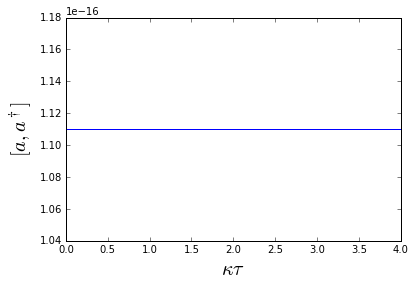

In [124]:
%matplotlib inline
from pylab import *
from scipy import integrate
kappa = 10.*2.*pi
k     = 0.
phi   = 0.
Delta = 0.
eps   = .75*kappa

def f(nu,ktau):
    tau   = ktau/kappa
    nom   = 2*(kappa+k*cos(phi+nu*tau))
    denom = (kappa-1j*(nu+Delta)+k*exp(1j*(nu*tau-phi)))*(kappa-1j*(nu-Delta)+k*exp(1j*(nu*tau+phi)))-eps**2
    print(nom)
    print(denom)
    return (nom/denom)

def fint(ktau):
    return integrate.quad(f, -np.inf, np.inf, args=(ktau))[0]

vec_fint = np.vectorize(fint)
ktauvec = linspace(0,4.,100)

figure(1)
plot(ktauvec, vec_fint(ktauvec))
xlabel('$\kappa\\tau$', fontsize=20)
ylabel('$[a,a^\dagger]$',fontsize=20)
show()

In [133]:
taudep = partial(f,nu=100)
plot(ktauvec,taudep(ktauvec).real,ktauvec,taudep(ktauvec).imag)

TypeError: f() got multiple values for argument 'nu'

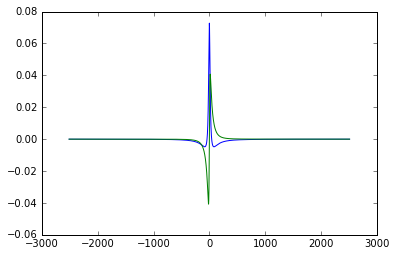

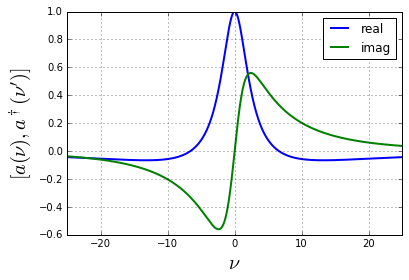

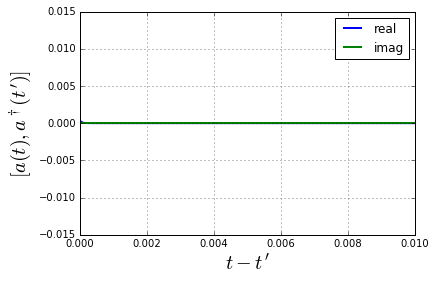

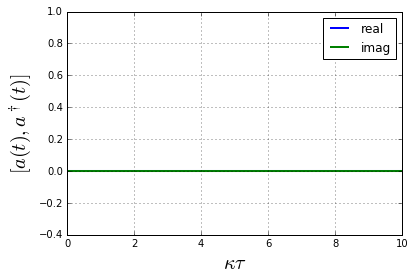

In [134]:
from functools import partial
from scipy.fftpack import fft

N = 16384
nu = linspace(-400*pi*2,400*pi*2,N)
f0 = partial(f,ktau=0)
figure(0)
plot(nu,f0(nu).real,nu,f0(nu).imag)
fourier = partial(f,ktau=2)
figure(1)
plot(nu/2./pi,(fourier(nu)/f0(0)).real,label="real",linewidth = 2.0)
hold(True)
plot(nu/2./pi,(fourier(nu)/f0(0)).imag,label="imag",linewidth = 2.0)
legend(loc='best')
xlabel('$\\nu$', fontsize = 20)
ylabel('$[a(\\nu),a^\dagger(\\nu^\prime)]$', fontsize = 20)
grid(True)
xlim(-25,25)
hold(False)

figure(2)
time = ifft(fourier(nu)/f0(0))
time0 = ifft(f0(nu)/f0(0))
space = (nu[N-1]-nu[0])/N
t = linspace(0,1/2/space,N)
#print(space)
#print(time[0])
#print(time[1])
#print(t[0])
#print(t[1])
plot(t,time.real,label="real",linewidth = 2.0)
hold(True)
plot(t, time.imag,label="imag",linewidth = 2.0)
#plot(t, time0.real,label="$\kappa\\tau=0$",linewidth = 2.0)
legend(loc='best')
xlabel('$t-t^\prime$', fontsize = 20)
ylabel('$[a(t),a^\dagger(t^\prime)]$', fontsize = 20)
xlim(0,.01)
grid(True)
hold(False)

figure(3)
Ni = 4000
ktau = zeros(Ni)
ddep = zeros(Ni,dtype=complex)
for i in range(Ni):
    ktau[i] = 0.0025*i
    four    = partial(f,ktau=ktau[i])
    timd    = ifft(four(nu)/f0(0))
    ddep[i] = timd[0]
plot(ktau,ddep.real,label='real',linewidth = 2.0)
hold(True)
plot(ktau,ddep.imag,label='imag',linewidth = 2.0)
legend(loc='best')
xlabel('$\kappa\\tau$', fontsize = 20)
ylabel('$[a(t),a^\dagger(t)]$', fontsize = 20)
grid(True)
ylim(-.4,1)
hold(False)
show()

In [142]:
def test(a,b):
    c=a+b
    return c

part = partial(test,a=5)
part(4)

TypeError: test() got multiple values for argument 'a'

In [ ]:
>>> sum = lambda x, y : x + y
>>> sum(1, 2)
3
>>> incr = lambda y : sum(1, y)
>>> incr(2)
3
>>> def sum2(x, y):
    return x + y

>>> incr2 = functools.partial(sum2, 1)
>>> incr2(4)
5